In [1]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('2020-XTern-DS.csv')

In [4]:
data.head()

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
0,ID_6321,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",$20.00,$50.00,3.5,12,4,30 minutes
1,ID_2882,39.775933,-85.740581,"Ice Cream, Desserts",$10.00,$50.00,3.5,11,4,30 minutes
2,ID_1595,39.253436,-85.123779,"Italian, Street Food, Fast Food",$15.00,$50.00,3.6,99,30,65 minutes
3,ID_5929,39.029841,-85.332050,"Mughlai, North Indian, Chinese",$25.00,$99.00,3.7,176,95,30 minutes
4,ID_6123,39.882284,-85.517407,"Cafe, Beverages",$20.00,$99.00,3.2,521,235,65 minutes


In [5]:
data['Minimum_Order'] = data['Minimum_Order'].replace('[\$,]', '', regex=True).astype(float)

In [6]:
''' Insight 1: Evaluating the best rated restaurants

Did some data cleaning where I got rid of non-float values.

'''

only_ratings = data.loc[data['Rating'] != '-']

In [7]:
only_ratings = only_ratings.loc[only_ratings['Rating'] != 'NEW']

In [8]:
only_ratings = only_ratings.loc[only_ratings['Rating'] != 'Opening Soon']

In [9]:
only_ratings['Rating'] = only_ratings['Rating'].astype(float)

In [10]:
only_ratings['Rating'].mean()

3.6093037214885975

In [11]:
best_rated = only_ratings.loc[only_ratings['Rating'] >= 4.5]

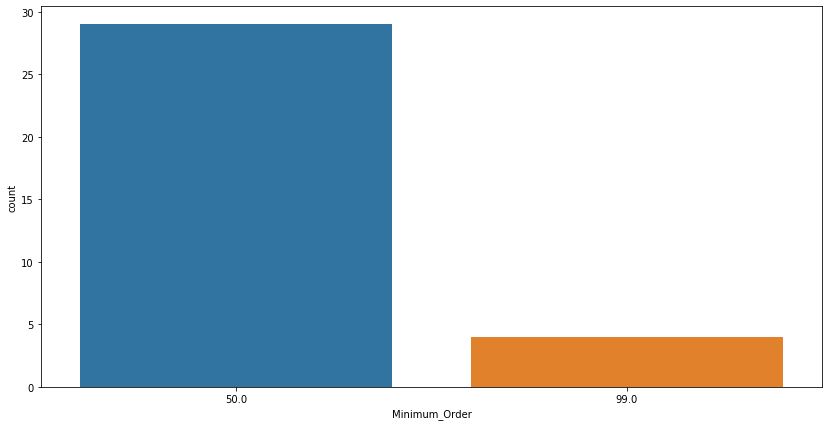

In [12]:
f, axis = plt.subplots(figsize=(14, 7))
sns.countplot(x='Minimum_Order', data=best_rated)

In [13]:
best_rated['Minimum_Order'].mean()

55.93939393939394

In [14]:
def ethnicity(x):
    ethnicities = {'Asian': ['Chinese', 'Indian', 'Thai', 'Tibetan'], 'European': ['French', 'Italian', 'Pizza'], 
                   'American': ['Burger', 'Fast Food', 'Ice Cream', 'Desserts', 'Bakery']}
    types = dict()
    types[x] = []
    for e, c in ethnicities.items():
        if e in x:
            types[x].append(e)
        else:
            for v in c:
                if v in x:
                    types[x].append(e)
                    break
    if len(types[x]) == 1:
        return types[x][0]
    else:
        return "Multicultural"
            

In [15]:
copy = best_rated
copy['Ethnicity'] = copy['Cuisines'].apply(lambda x: ethnicity(x))

/Users/cdu2620/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


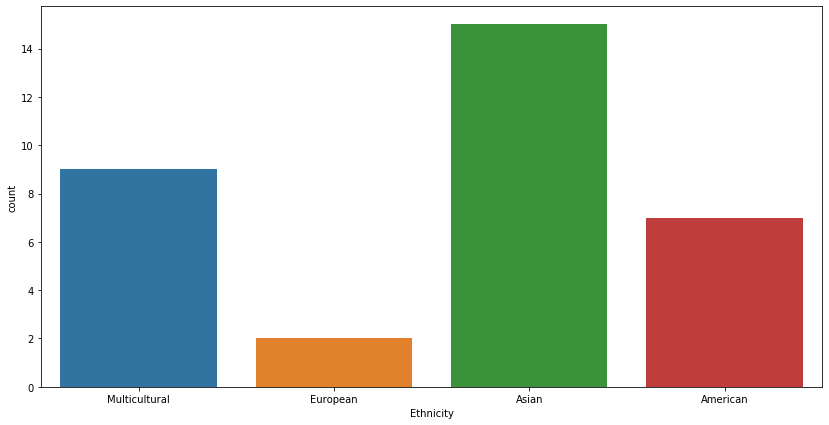

In [16]:
f, axis = plt.subplots(figsize=(14, 7))
sns.countplot(x='Ethnicity', data=best_rated)

In [17]:
best_rated['Votes'] = best_rated['Votes'].astype(int)
rating_vote = best_rated['Votes'].mean()
rating_vote

/Users/cdu2620/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1283.121212121212

In [18]:
'''
Insight 2: Evaluating trending restaurants by number of votes

'''
only_voted = data.loc[data['Votes'] != '-']

In [19]:
only_voted['Votes'] = only_voted['Votes'].astype(int)

/Users/cdu2620/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
best_voted = only_voted.loc[only_voted['Votes'] >= 3000]
best_voted

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
80,ID_7753,39.571114,-85.069320,"European, Continental, North Indian, Desserts",$75.00,50.0,4.3,3124,1660,45 minutes
123,ID_2885,39.543546,-85.186797,"German, Italian, Cafe",$45.00,50.0,4.3,4691,2547,45 minutes
175,ID_4202,39.244727,-85.741670,"Parsi, Bakery",$20.00,50.0,4.0,4335,2363,30 minutes
197,ID_2041,39.169006,-85.230237,"Italian, Pizza, Salad, Healthy Food, Mexican, ...",$65.00,50.0,4.4,3248,1603,45 minutes
281,ID_4202,39.942907,-85.587784,"Parsi, Bakery",$20.00,50.0,4.0,4335,2363,30 minutes
335,ID_1947,39.092982,-85.673167,"Bar Food, North Indian, Italian, Continental",$55.00,50.0,4.3,3394,1845,30 minutes
732,ID_8087,39.729100,-85.422667,"Chinese, Thai, Asian, Malaysian, Vietnamese, S...",$60.00,99.0,4.2,3782,1948,30 minutes
770,ID_847,39.446138,-85.139694,"North Indian, Street Food, South Indian, Mithai",$30.00,99.0,4.2,3021,1174,65 minutes
1180,ID_1064,39.587777,-85.564805,"Continental, North Indian, BBQ, Steak",$80.00,50.0,4.7,9054,6504,45 minutes
1300,ID_1666,39.959980,-85.903329,"Mexican, American, Italian, Burger",$50.00,99.0,4.6,4903,3989,65 minutes


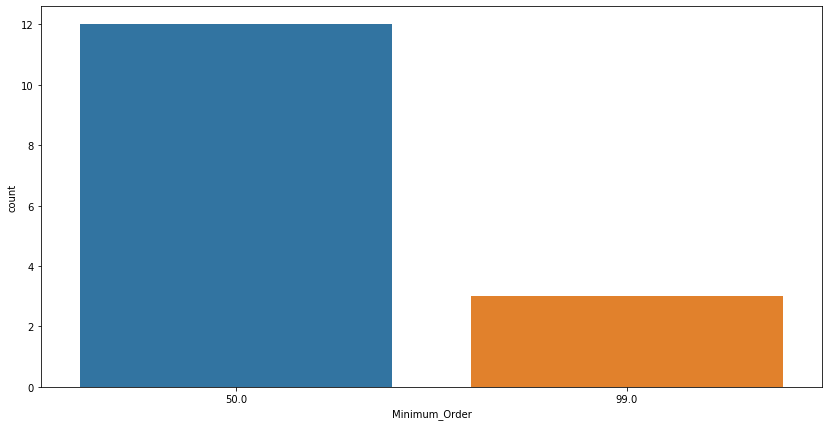

In [21]:
f, axis = plt.subplots(figsize=(14, 7))
sns.countplot(x='Minimum_Order', data=best_voted)

In [24]:
#best_voted['Average_Cost'] = best_voted['Average_Cost'].replace('[\$,]', '', regex=True).astype(float)
best_voted['Minimum_Order'].mean()

59.8

In [22]:
best_voted['Ethnicity'] = best_voted['Cuisines'].apply(lambda x: ethnicity(x))
best_voted

/Users/cdu2620/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time,Ethnicity
80,ID_7753,39.571114,-85.069320,"European, Continental, North Indian, Desserts",$75.00,50.0,4.3,3124,1660,45 minutes,Multicultural
123,ID_2885,39.543546,-85.186797,"German, Italian, Cafe",$45.00,50.0,4.3,4691,2547,45 minutes,European
175,ID_4202,39.244727,-85.741670,"Parsi, Bakery",$20.00,50.0,4.0,4335,2363,30 minutes,American
197,ID_2041,39.169006,-85.230237,"Italian, Pizza, Salad, Healthy Food, Mexican, ...",$65.00,50.0,4.4,3248,1603,45 minutes,Multicultural
281,ID_4202,39.942907,-85.587784,"Parsi, Bakery",$20.00,50.0,4.0,4335,2363,30 minutes,American
335,ID_1947,39.092982,-85.673167,"Bar Food, North Indian, Italian, Continental",$55.00,50.0,4.3,3394,1845,30 minutes,Multicultural
732,ID_8087,39.729100,-85.422667,"Chinese, Thai, Asian, Malaysian, Vietnamese, S...",$60.00,99.0,4.2,3782,1948,30 minutes,Asian
770,ID_847,39.446138,-85.139694,"North Indian, Street Food, South Indian, Mithai",$30.00,99.0,4.2,3021,1174,65 minutes,Asian
1180,ID_1064,39.587777,-85.564805,"Continental, North Indian, BBQ, Steak",$80.00,50.0,4.7,9054,6504,45 minutes,Asian
1300,ID_1666,39.959980,-85.903329,"Mexican, American, Italian, Burger",$50.00,99.0,4.6,4903,3989,65 minutes,Multicultural


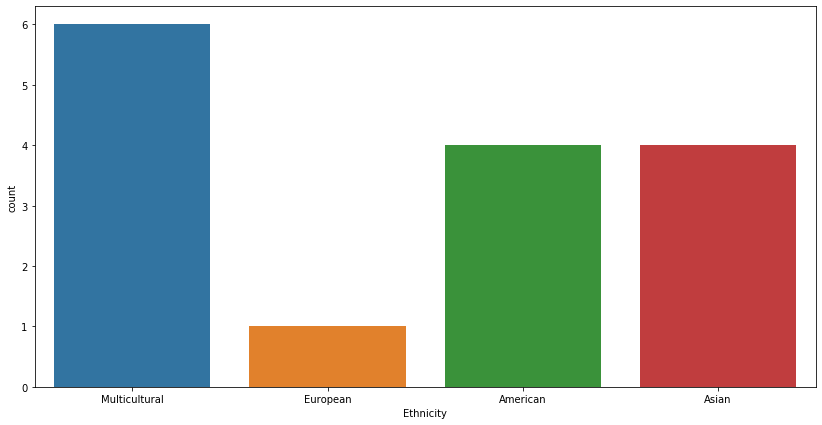

In [23]:
f, axis = plt.subplots(figsize=(14, 7))
sns.countplot(x='Ethnicity', data=best_voted)

In [25]:
best_voted['Rating'] = best_voted['Rating'].astype(float)
vote_rating = best_voted['Rating'].mean()
vote_rating

/Users/cdu2620/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


4.260000000000001

In [26]:
'''Insight 3: Seeing if restaurants with fast cook times suffer impacts in quality of food'''

def minutes(s):
    return int(s.split(' ')[0])

data['Cook_Time'] = data['Cook_Time'].apply(lambda x: minutes(x))

In [27]:
data['Cook_Time'].mean()

36.92174343734522

In [28]:
fastest = data.loc[data['Cook_Time'] <= 30]

In [29]:
fastest

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
0,ID_6321,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",$20.00,50.0,3.5,12,4,30
1,ID_2882,39.775933,-85.740581,"Ice Cream, Desserts",$10.00,50.0,3.5,11,4,30
3,ID_5929,39.029841,-85.332050,"Mughlai, North Indian, Chinese",$25.00,99.0,3.7,176,95,30
5,ID_5221,39.370441,-85.739516,"South Indian, North Indian, Chinese",$15.00,50.0,3.8,46,18,30
6,ID_3777,39.821806,-85.005577,"Beverages, Fast Food",$15.00,50.0,3.7,108,31,30
...,...,...,...,...,...,...,...,...,...,...
2013,ID_5794,39.764745,-85.121567,Bengali,$20.00,50.0,3.3,16,6,30
2014,ID_4366,39.624978,-85.189212,"North Indian, Pizza, Burger, Continental",$40.00,0.0,-,-,-,30
2015,ID_319,39.133719,-85.503020,"Awadhi, Bihari",$40.00,99.0,4.1,118,91,30
2016,ID_3104,39.662987,-85.950894,"Fast Food, Beverages",$10.00,50.0,NEW,-,-,30


In [30]:
fastest_votes = fastest.loc[fastest['Votes'] != '-']
fastest_votes['Votes'] = fastest_votes['Votes'].astype(float)

/Users/cdu2620/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


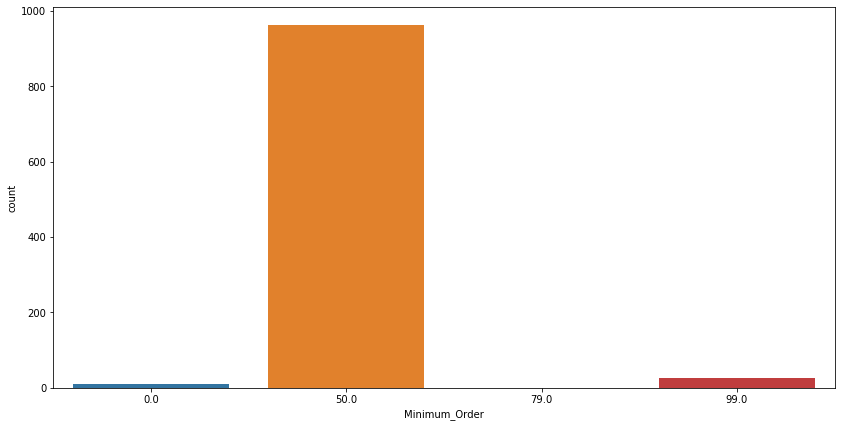

In [49]:
f, axis = plt.subplots(figsize=(14, 7))
sns.countplot(x='Minimum_Order', data=fastest_votes)

In [32]:
fastest_votes['Minimum_Order'].mean()

50.802

In [33]:
fastest_votes['Votes'].mean()

139.723

In [34]:
fastest_ratings = fastest.loc[fastest['Rating'] != '-']
fastest_ratings = fastest_ratings.loc[fastest_ratings['Rating'] != 'NEW']
fastest_ratings = fastest_ratings.loc[fastest_ratings['Rating'] != 'Opening Soon']
fastest_ratings['Rating'] = fastest_ratings['Rating'].astype(float)

In [35]:
fastest_ratings['Rating'].mean()

3.544195121951218

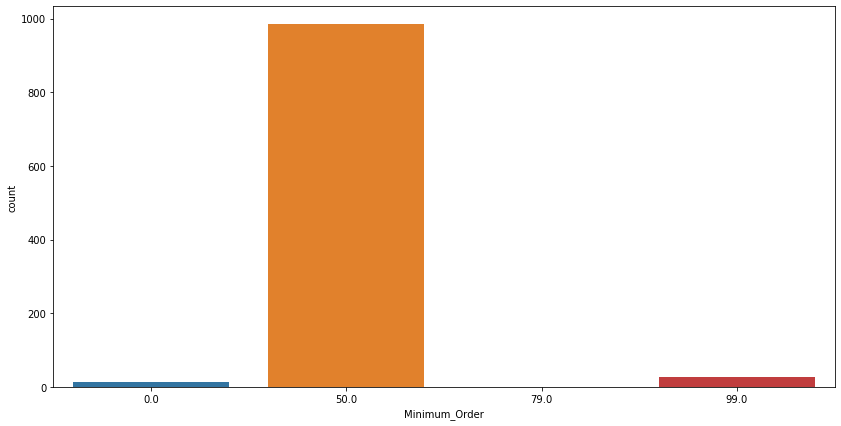

In [36]:
f, axis = plt.subplots(figsize=(14, 7))
sns.countplot(x='Minimum_Order', data=fastest_ratings)

In [37]:
fastest_ratings['Minimum_Order'].mean()

50.781463414634146

In [38]:
'''Insight 4: Cheapest'''
cheapest = data.loc[data['Minimum_Order'] <= 50]
cheapest

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
0,ID_6321,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",$20.00,50.0,3.5,12,4,30
1,ID_2882,39.775933,-85.740581,"Ice Cream, Desserts",$10.00,50.0,3.5,11,4,30
2,ID_1595,39.253436,-85.123779,"Italian, Street Food, Fast Food",$15.00,50.0,3.6,99,30,65
5,ID_5221,39.370441,-85.739516,"South Indian, North Indian, Chinese",$15.00,50.0,3.8,46,18,30
6,ID_3777,39.821806,-85.005577,"Beverages, Fast Food",$15.00,50.0,3.7,108,31,30
...,...,...,...,...,...,...,...,...,...,...
2013,ID_5794,39.764745,-85.121567,Bengali,$20.00,50.0,3.3,16,6,30
2014,ID_4366,39.624978,-85.189212,"North Indian, Pizza, Burger, Continental",$40.00,0.0,-,-,-,30
2016,ID_3104,39.662987,-85.950894,"Fast Food, Beverages",$10.00,50.0,NEW,-,-,30
2017,ID_4396,39.301765,-85.662768,"Kebab, Fast Food",$10.00,50.0,-,-,-,30


In [39]:
cheapest_ratings = cheapest.loc[cheapest['Rating'] != '-']
cheapest_ratings = cheapest_ratings.loc[cheapest_ratings['Rating'] != 'NEW']
cheapest_ratings = cheapest_ratings.loc[cheapest_ratings['Rating'] != 'Opening Soon']
cheapest_ratings['Rating'] = cheapest_ratings['Rating'].astype(float)

In [40]:
cheapest_ratings['Rating'].mean()

3.599739073711675

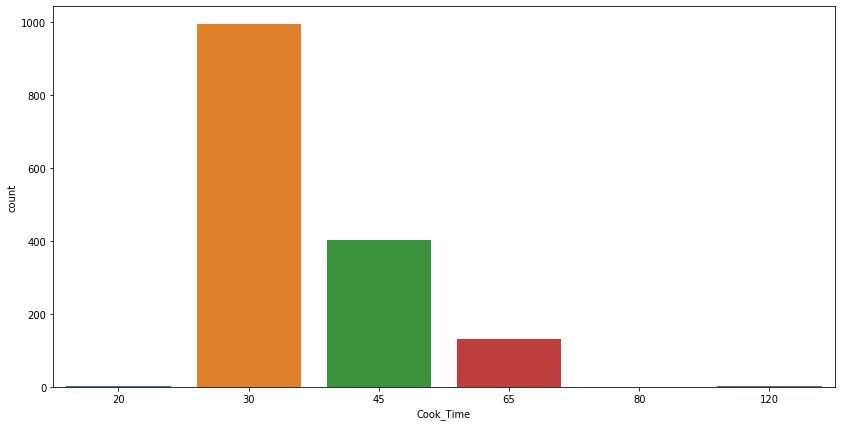

In [42]:
f, axis = plt.subplots(figsize=(14, 7))
sns.countplot(x='Cook_Time', data=cheapest_ratings)

In [41]:
cheapest_ratings['Cook_Time'].mean()

37.11350293542074

In [43]:
cheapest_votes = cheapest.loc[cheapest['Votes'] != '-']
cheapest_votes['Votes'] = cheapest_votes['Votes'].astype(float)

/Users/cdu2620/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
cheapest_votes['Votes'].mean()

234.45653616456536

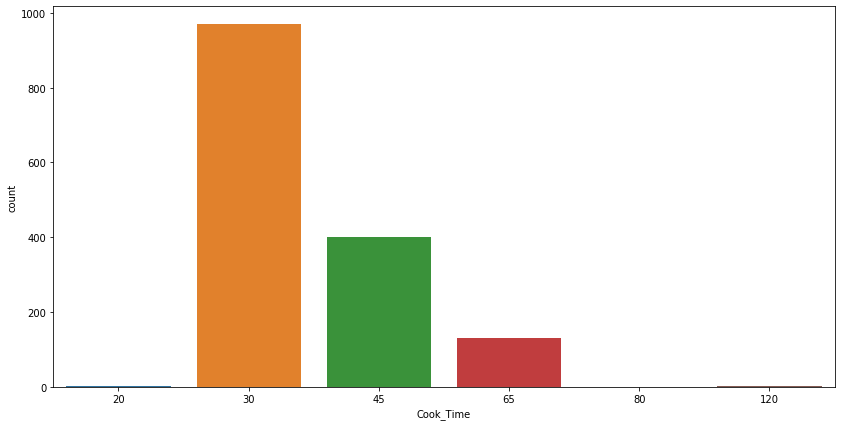

In [46]:
f, axis = plt.subplots(figsize=(14, 7))
sns.countplot(x='Cook_Time', data=cheapest_votes)

In [45]:
cheapest_votes['Cook_Time'].mean()

37.21632382216324

In [47]:
'''
With this analysis, I tried to determine what was a better metric of quality: a better rating, or more votes. I also
analyzed some restaurant information of the best rated and most voted restaurants. Interestingly, the restaurants
classified as "top" by rating would not have been classified as "top" by number of votes, and vice versa, although
their average ratings and votes were still far above the average for all restaurants. The range of minimum
order price of the top restaurants (both best rated and most voted) was around $50-99 - a middle-level cost. 
A lot of the higher-rated restaurants served primarily Asian food, but the restaurants with the most food 
were multicultural. This makes sense based on my own personal experience - people tend to like Asian cuisine
a lot, but multicultural restaurants get more exposure that lead to more votes.

Next, I tried to see whether attempts to make steps of the food delivery process more appealing,
such as lowering cook time and lowering the price of the min order, led to a decrease in quality perceived by the 
customers of the restaurants. We've all been in situations where we just wanted to pick the cheapest or the 
fastest option, but as a result, our dining experience may not have been as enjoyable. The restaurants with the 
fastest cook time also turned out to be slightly cheaper than average, with an min order of $50. However, 
it turned out the inverse wasn't necessarily true - that cheaper restaurants didn't have a shorter cook time 
than average. Either way, the rating and number of votes for both the cheapest and the quickest restaurants 
were lower than average. This goes to show that customers care more about the quality of the food 
than the price or delivery time, so restaurants may as well increase prices to draw in customers.



'''

'\nWith this analysis, I tried to determine what was a better metric of quality: a better rating, or more votes. I also\nanalyzed some restaurant information of the best rated and most voted restaurants. Interestingly, the restaurants\nclassified as "top" by rating would not have been classified as "top" by number of votes, and vice versa, although\ntheir average ratings and votes were still far above the average for all restaurants. The range of minimum\norder price of the top restaurants (both best rated and most voted) was around $50-99 - a middle-level cost. \nA lot of the higher-rated restaurants served primarily Asian food, but the restaurants with the most food \nwere multicultural. This makes sense based on my own personal experience - people tend to like Asian cuisine\na lot, but multicultural restaurants get more exposure that lead to more votes.\n\nNext, I tried to see whether attempts to make steps of the food delivery process more appealing,\nsuch as lowering cook time and